# Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості

## Завдання для самостійної роботи 

In [73]:
import json
import numpy as np

data_variant2 = {
    "x_train_1": [
        [26, 41],
        [11, 28],
        [27, 48],
        [24, 31],
        [ 9, 48],
        [26, 24],
        [50, 38],
        [30, 41],
        [36, 35]
    ],
    "y_train_1": [-1,  1, -1,  1, -1,  1,  1,  1, -1]}

with open("data_variant2_lab2.json", "w", encoding="utf-8") as f:
    json.dump(data_variant2, f, ensure_ascii=False, indent=4)

with open("data_variant2_lab2.json", "r", encoding="utf-8") as f:
    imported_data = json.load(f)

x_train = imported_data["x_train_1"]
x_train = np.array([x + [1] for x in x_train])
y_train_orig = np.array(imported_data["y_train_1"])
y_train = np.array([1 if i == 1 else 0 for i in y_train_orig])

x_train, y_train

(array([[26, 41,  1],
        [11, 28,  1],
        [27, 48,  1],
        [24, 31,  1],
        [ 9, 48,  1],
        [26, 24,  1],
        [50, 38,  1],
        [30, 41,  1],
        [36, 35,  1]]),
 array([0, 1, 0, 1, 0, 1, 1, 1, 0]))

Обчислені вагові коефіцієнти w:
[ 0.0064763  -0.0415899   1.92702116]


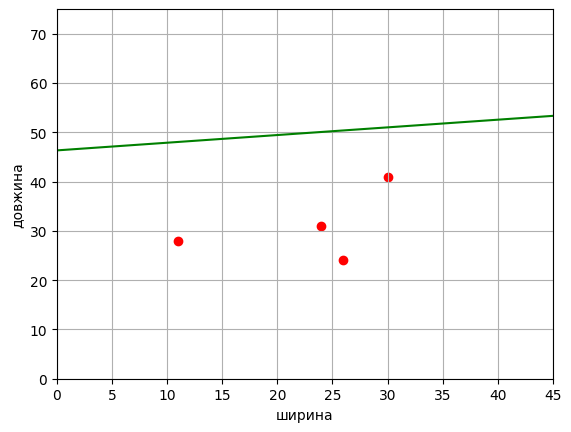

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# # Дані для тренування
# x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
# # Додаємо зміщення (bias term = 1) для кожного прикладу
# x_train = [x + [1] for x in x_train]
# x_train = np.array(x_train)

# # Мітки класів (-1 або 1)
# y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)

xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)

w = np.dot(pt, np.linalg.inv(xxt))

print("Обчислені вагові коефіцієнти w:")
print(w)

# Формування координат для лінії розділення w[0]*x + w[1]*y + w[2] = 0
# y = (-w[0]*x - w[2]) / w[1]
line_x = list(range(max(x_train[:, 0])))
line_y = [(-x*w[0]/w[1] - w[2]/w[1]) for x in line_x]

# Розділення точок за класами для візуалізації
x_0 = x_train[y_train == 1]                 # Точки класу 1
x_1 = x_train[y_train == -1]                # Точки класу -1

# Візуалізація
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

# Налаштування графіка
plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

## Контрольні питання


1. Що таке відступ (margin) і яка його роль в побудові моделі класифікації?
   - Він вимірює скалярний добуток між вектором ваг ω та вектором ознак $ x_i $, помножений на правильну мітку класу $ y_i $. По суті, це показник впевненості класифікатора, що враховує знак.
   
2. Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв’язаня задачі оптимізації через знаходження похідної?
    - Вона кількісно оцінює, наскільки "погано" модель працює на навчальних даних (наскільки її прогнози відрізняються від істинних міток). Мета навчання — знайти такі коефіцієнти ω, які мінімізують цю функцію втрат.
   3. Чим приницпово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?
    - бінарний класифікатор (Перцептрон) ітеративно виправляє помилки класифікації, тоді як МНК-класифікатор знаходить аналітичне рішення, мінімізуючи суму квадратів помилок.
   
4. Вивести математичний вираз для оцінки вектора w?

    - $   {\omega} = (X^T X)^{-1} X^T y. $